<a href="https://colab.research.google.com/github/sergiogf93/MetNumerics/blob/master/notebooks/12_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<p  style="font-size: 3rem; line-height: 4rem; font-weight: bold; text-align: center;"> Tutorial: Introduction to Data Analysis and Machine Learning</p>

<p style="font-size: 2rem; font-weight: bold; text-align: center;"> Kai A. Brügge & Maximilian Nöthe</p>

<p style="font-size: 1.5rem; font-weight: bold; text-align: center;"> DPG Früjahrstagung Aachen 2019</p>

<img width="200px" src="https://www.dpg-physik.de/vereinigungen/fachuebergreifend/ak/akpik/pix/logo-ak-pik_blue.png"/>


> __People worry that computers will get too smart and take over the world, but the real problem is that they're too stupid and they've already taken over the world.__

> Pedro Domingos 


In [14]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [15]:
%%html
<style>
.important
{
     margin: 0 auto;
     width: 66%; 
     background-color: linen;
}
</style>

<script>
$(this).html().replace("#e58139","#f2f2f2")
</script>




Do not delete, math definitions here
$$
% vectors and matrices
\def\v#1{\boldsymbol{#1}}
\def\m#1{\boldsymbol{#1}}
% confusion matrix stuff
\def\TP{\mathit{TP}}
\def\TN{\mathit{TN}}
\def\FP{\mathit{FP}}
\def\FN{\mathit{FN}}
\def\mse{{\rm mse}}
\def\E{{\rm E}}
\def\Var{{\rm Var}}
\def\Bias{{\rm Bias}}
\def\T{\mathtt{True}}
\def\F{\mathtt{False}}
$$


<h1 id="tocheading">Continguts</h1>
<div id="toc"></div>

# Supervised Machine Learning


## Notació matemàtica i descripció del problema

*Per més informació "Elements of statistical Learning" by Trevor Hastie.
(http://web.stanford.edu/~hastie/ElemStatLearn/)* 

* Les lletres majúscules com $ X $ o $ Y $ indiquen aspectes genèrics d’una variable (és a dir, la variable aleatòria real)
* Els valors observats s'escriuen en minúscules. El i-èsim valor de $ X $ s’escriu com $ x_i $
* Les matrius estan escrites en negreta amb lletres majúscules $ \m {X} $
* Les observacions es distribueixen com a * files * a la matriu mentre que les variables observades són les * columnes *

Així, si mesurem dos observables $ p = 2 $ (mida i pes) de $ N = 100 $ persones, obtenim una matriu $ \m {X} $ ($ N \times p $ ).


Una possible definició del Supervised Machine Learning:

> Donada una matriu $ \m {X} $ ($ N \times p $) i un vector output associat $ Y \in \mathbb{R} ^ N $,
  troba una funció $ f (X) = \hat{Y} $ que pren un vector $ X \in \mathbb {R} ^ p $ i retorna una predicció per $ \hat {Y} $
  on es minimitza una "loss function" $ L (Y, f (X)) ~~ \forall X $.
 

## L'exemple del Titanic. Aprendre del desastre.

A la primavera de 1912 el Titanic va emprendre un viatge per creuar l'oceà Atlàntic. Malauradament va xocar contra un iceberg la nit del 14 d'abril i es va enfonsar poc després.

El desastre va causar una indignació generalitzada sobre el que es va veure com una falta de seguretat. Les noves lleis de seguretat marítima que es van establir després de l’enfonsament encara són vigents avui dia.

Què podem aprendre del Titanic només mirant les dades de passatgers?

Les nostres dades contenen una llista del nom, sexe, edat i preu del bitllet per a cada passatger (conegut).

Importeu el fitxer **titanic.xls** trobat al repositori.

![titanic_cover.jpg](attachment:titanic_cover.jpg)

### Let's explore the data at first

In [0]:
!pip install --upgrade pandas

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [0]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

plt.rcParams['figure.figsize'] = (10.5, 7)
plt.rcParams['font.size'] = 12

colors = ['xkcd:sky', 'xkcd:grass']
cmap = ListedColormap(colors)

In [0]:
passengers = pd.read_excel('titanic.xls')


passengers.head()

La supervivència està codificada com 1, la mort com a 0.

Anem a canviar-ho en un tipus de dades significatives per python

In [0]:
passengers['survived'] = passengers['survived'].astype(bool)

In [0]:
(
    passengers.survived
    .value_counts()
    .sort_index()
    .plot.pie(autopct='%.1f %%', colors=colors)
)

In [0]:
fig, axs = plt.subplots(1, 2)

for i, (sex, group) in enumerate(passengers.groupby('sex')):
    (
        group
        .survived
        .value_counts()
        .sort_index()  # make sure the same label get's the same color
        .plot.pie(autopct='%.1f %%', colors=colors, title=sex, ax=axs[i])
    )

In [0]:
import numpy as np
import seaborn as sns


plot_data = passengers[['fare', 'sex', 'age', 'survived']].dropna() 
plot_data['log_fare'] = np.log10(1 + plot_data['fare'])


age_range = [plot_data.age.min(), plot_data.age.max()]
fare_range = [plot_data.log_fare.min(), plot_data.log_fare.max()]
    

for sex, df_sex in plot_data.groupby('sex'):
    
    df_sex.copy().dropna(inplace=True)
    g = sns.JointGrid(x='log_fare', y='age', data=plot_data) 
    g.fig.suptitle(sex)
    
    m = g.ax_joint.scatter(
        df_sex['log_fare'],
        df_sex['age'],
        c=df_sex['survived'],
        cmap=cmap,
        s=10,
    )

    for label, group in df_sex.groupby('survived'):    
        g.ax_marg_y.hist(
            group['age'], bins=15, range=age_range, 
            histtype='step', lw=2, color=colors[label], orientation='horizontal'
        )
        g.ax_marg_x.hist(
            group['log_fare'], bins=15, range=fare_range,
            histtype='step', lw=2, color=colors[label],
        )
    
    cbar = plt.colorbar(m)
    cbar.set_ticks([0.25, 0.75])
    cbar.set_ticklabels(['Died', 'Survived'])
    g.fig.tight_layout()

__La tasca:__

Donat un vector $\boldsymbol{X} = (\mathtt{fare}, \mathtt{pclass}, \mathtt{age}, \mathtt{sex})$ podem trobar una funció $f_\text{survival}(x) \in \{\T, \F\}$ que predigui acuradament la supervivència dels passatgers en la majoria  de casos?

Com podem saber si la funció $f_\text{survival}(x)$  és bona?

Per tenir una certa mesura de la qualitat d’aquest predictor, recopilem els següents números:

* __True Positives__ $\TP$, El nombre de prediccions correctes que són de tipus 'positiu'

* __False Positives__ $\FP$, El nombre d’esdeveniments predits falsament com a positius que pertanyen a la classe "negativa"
* __True Negatives__ $\TN$, El nombre d’esdeveniments predits correctament que pertanyen a la classe “negativa”
* __False Negatives__ $\FN$, El nombre d’esdeveniments predits falsament com a negatius que pertanyen a la classe "positiva"

Podem mirar la fracció d’observacions correctament etiquetades a les dades

$$
    \mathrm{accuracy}(\v{y}, \v{\hat{y}}) = \frac{1}{N} \sum_{i = 1}^N \mathbb{1}(y_i = \hat{y}_i)
$$

o simplement

$$
    \mathrm{accuracy}(\v{y}, \v{\hat{y}}) =  \frac{\TP + \TN}{ \TP + \FP + \FN + \TN} = \frac{\text{correctly predicted observations}}{\text{total number of observations}}.
$$


Ara intentem trobar una funció on la precisió sigui superior a 0,5

__ Una solució possible __:

Primer les dones i els nens?

In [0]:
def f_survival(df):
    return df['sex'] == 'female'


truth = passengers['survived']
prediction = f_survival(passengers)

prediction.head()

Quina precisió obtenim?

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion = confusion_matrix(truth, prediction)
accuracy = accuracy_score(truth, prediction)

confusion, accuracy

In [0]:
import seaborn as sns



def plot_confusion(truth, prediction):
    ''' We need this a couple of times, so let's make a function '''

    accuracy = accuracy_score(truth, prediction)
    confusion = confusion_matrix(truth, prediction)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3), constrained_layout=True)


    fig.suptitle(f"Accuracy {accuracy:.1%}")
    
    df = pd.DataFrame({
        'truth': pd.Series(truth).value_counts().sort_index(),
        'prediction': pd.Series(prediction).value_counts().sort_index(),
    })
    df.plot.barh(color=['gray', colors], ax=ax1, legend=False)
    
    sns.heatmap(
        confusion,
        annot=True,
        fmt="d",
        cmap='viridis',
        xticklabels=["False", "True"],
        yticklabels=["False", "True"],
        ax=ax2,
        square=True,
    )
    
    ax2.text(0.5, -0.2, 'Prediction', transform=ax2.transAxes, ha='center', va='top')
    ax2.text(-0.2, 0.5, 'Truth', transform=ax2.transAxes, ha='right', va='center', rotation=90)
    return ax1, ax2
    
plot_confusion(truth, prediction)

Com podem millorar la classificació?

Podem intentar aprendre més sobre el que va passar al Titanic.

Si mirem la pel·lícula de 1997 on **SPOILER** Leonardo Di Caprio s'ofega juntament amb molts dels seus amics passatgers de tercera classe.

<br/>
<br/>
<br/>
<br/>
<img width="50%" src=" 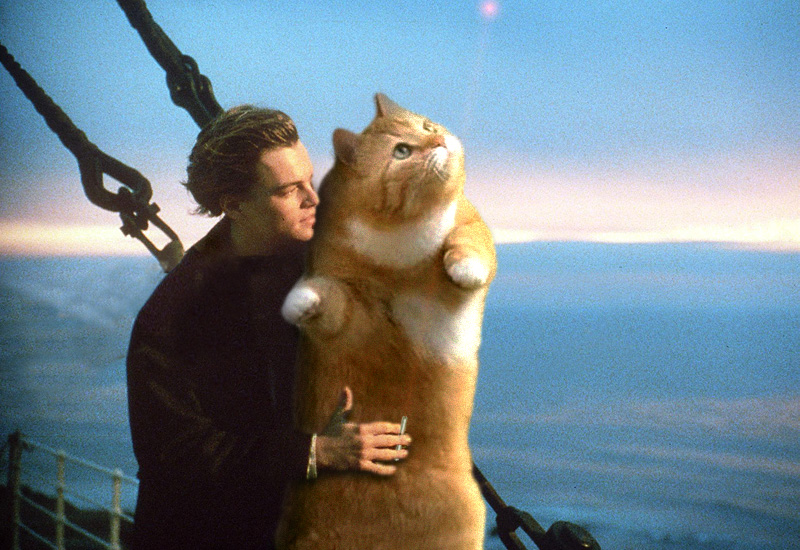"/>

Considerem que les persones riques entren en els bots salvavides

In [0]:
def f_class(passenger_class):
    return passenger_class == 1


prediction = passengers['pclass'].apply(f_class)
truth = passengers['survived']

plot_confusion(truth=truth, prediction=prediction)

## Linear Models

Podem millorar el nostre predictor combinant més variables?

Considerem una combinació ponderada lineal de variables:

$\def\RSS{\operatorname{RSS}}$

$$
f(x)= \hat{y} =  \hat{\beta}_0 + \sum_{j=1}^p x_j \hat{\beta}_j
$$
on $f:\mathbb{R}^{p} \to \mathbb{R}$.

Per a una sola mostra de les dades del Titanic, simplement avaluem:
$$
f(x)= \hat{\beta}_0 + x_\text{Class} \hat{\beta}_1 + x_\text{Sex} \hat{\beta}_2
$$

Si posem 1 com la primera entrada de la nostra mostra $\v{x}$ e.g. $\v{x} = (1, x_1, x_2, \ldots, x_p)$ podem reescriure
$f$ en forma de matriu

$$
f(x)= \hat{y} =  \v{x}^\top \v{\beta}
$$

on $\v{\beta} = (\beta_0, \beta_1, \beta_2, \ldots, \beta_p)$.



Com trobem aquests pesos? Igual que abans escollim una funció de pèrdua i intentem l'optimitzar-la.
En aquest cas, escollim una funció de pèrdua anomenada suma residual de quadrats (residual sum of squares RSS).

La calculen sobre totes les mostres $x_i$ a una matriu $\boldsymbol{X}$.

<div class="important"> 

$$L(\v{\beta}) = \RSS(\v{\beta}) = \sum_{i=1}^N (y_i - \v{x}_i^\top \v\beta)^2 $$

</div>



on $\v{x}_i$ és una fila de $\v{X}$, i per tant, cal fer la transposada.

Ara podem reescriure la funció de pèrdua en forma de matriu:

$$
\RSS(\v\beta) = (\v{y} - \m{X} \v\beta)^\top (\v{y} - \m{X} \v\beta )
$$

Ara optimitzem la funció de pèrdua de la mateixa manera que ho faríem amb qualsevol altra funció, mitjançant la diferenciació respecte de $ \v \beta $ i imposant que el resultat sigui igual a zero.

Per més informació sobre el procediment per fer càlcul sobre matrius, mireu https://en.wikipedia.org/wiki/Matrix_calculus, 

Necessitem la regla de la cadena:
$$
\frac{\partial({\v{u}} \cdot {\v{v}})}{\partial{\v{x}}}= 
 \v{u}^\top \frac{\partial \v{v}}{\partial \v{x}} + \v{v}^\top \frac{\partial \v{u}}{\partial \v{x}}
$$

En el nostre cas:
$$
 2 \cdot \m{X}^T (\v{y} - \m{X} \v\beta ) \stackrel{!}{=} 0
$$

La corresponent $\v\beta$ ldóna

$$
\hat{\v\beta} = (\m{X}^\top \m{X})^{-1} \m{X}^\top \v{y}
$$


Acabem de fer una regressió de __Mínims Quadrats__.

Ara podem definir una funció per predir la supervivència d'un passatger com:

$$
\hat{y} = \begin{cases}
\T, & \text{if $ f(x) \gt 0.5$} \\
\F, & \text{if $ f(x) \le 0.5$}
\end{cases}
$$ 



In [0]:
from sklearn import linear_model
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=400, centers=2, cluster_std=1., random_state=0)

# train the linear regressor and save the coefficents

reg = linear_model.LinearRegression()
reg.fit(X, y)
b_1, b_2 = reg.coef_
b_0 = reg.intercept_

# solve the function y = b_0 + b_1*X_1 + b_2 * X_2 for X2
x1s = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 2)
x2s = (0.5 - b_0 - b_1 * x1s) / b_2


fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], s=25, c=y, cmap=cmap)

ax.plot(x1s, x2s, color='gray', linestyle='--')

ax.grid()
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.margins(x=0, y=0)

ax.fill_between(x1s, x2s, np.max(X[:, 1]), color='xkcd:sky', alpha=0.1)
ax.fill_between(x1s, x2s, np.min(X[:, 1]), color='xkcd:grass', alpha=0.1)
ax.set_aspect(1)


Acabem d'*aprendre* els paràmetres d’un model estadístic basat en dades etiquetades.

Pot aquesta classificació lineal millorar la classificació del cas del Titanic?


### Aplicació al conjunt de dades titànic (preparació de dades)

Amb conjunts de dades del món real, les coses són més complicades

El conjunt de dades del Titanic conté:

* Falta de dades (p. Ex., "age" i "fare")
* Dades no numèriques (p. Ex., "sex")
* Dades categòriques (possiblement "pclass")
* Columnes que són massa indicatives del resultat del que volem predir (`boat`,` body`)

#### Falta de dades

In [0]:
passengers.count().sort_values()

Hi ha diferents estratègies sobre com resoldre el problema
de falta de dades.
    
* Simplement eliminar totes les files i / o columnes amb números que faltin
* Omplir els valors amb valors calculats a partir de les altres files, com ara la mitjana o coses més sofisticades

En el nostre cas, podem seguir la primera estratègia.

In [0]:
passengers.dropna()

Retirem les columnes, que contenen principalment dades que falten

In [0]:
missing_percentage = 1 - passengers.count() / len(passengers)

columns = missing_percentage[missing_percentage > 0.25].index
columns

In [0]:
useful_columns = passengers.drop(columns, axis=1)

In [0]:
nans = useful_columns.isna().any(axis=1)
useful_columns.loc[nans].head()

i les files que contenen nans

In [0]:
without_missing = useful_columns.dropna()

print(len(without_missing))

without_missing.head()

podríem reemplaçar-les amb seves respectives mitjanes.

In [0]:
imputed = useful_columns.copy()

imputed['age'].fillna(imputed['age'].mean(), inplace=True)
imputed['fare'].fillna(imputed['fare'].mean(), inplace=True)

print(len(imputed))
imputed.loc[nans].head()

#### Dades no numèriques

In [0]:
passengers.select_dtypes(exclude='number').head()

Ho podem resoldre bàsicament de dues maneres,

1. Simplement substituir amb un número identificatiu
2. Crear columnes dummy booleanes que continguin 1 o 0

El primer cas té el desavantatge  d'introduir ordre en alguna cosa que potser no en tingui.
Això es resol amb el segon mètode.

Per exemple. si mirem embarcats i substituïm

S(outhhampton) → 0, C(herbourg) → 1, Q(ueenstown) → 2,   

alguns algoritmes de machine learning podríen pensar que Q > C > S.

In [0]:
pd.get_dummies(passengers['embarked'], prefix='embarked').iloc[[1, 100, 300, 800]].head()

In [0]:
pd.Categorical(passengers['embarked']).codes

#### Columnes que són bàsicament trampa

Sovint alguns datasets contenen columnes que no serien disponibles quan es vol fer la predicció.

Per exemple, variables Truth en simulacions Monte Carlo a la física.

Sembla que algunes persones van caure dels bots salvavides, es van congelar o van ser menjades pels taurons

In [0]:
passengers.loc[~passengers.boat.isna(), 'survived'].value_counts()

In [0]:
passengers.loc[~passengers.body.isna(), 'survived'].value_counts()

### Ajuntant-ho tot


In [0]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

df = passengers.copy()

# strings to numbers
df['sex_code'] = pd.Categorical(df['sex']).codes
df = df.join(pd.get_dummies(df['embarked'], prefix='embarked'))

# remove not-useful columns (missing data, labels, not convertable)
df.drop(['body', 'cabin', 'boat', 'home.dest', 'sex', 'embarked', 'ticket', 'name'], axis=1, inplace=True)
df.dropna(inplace=True)

print(len(df))
df.head()

L’avaluació del rendiment en exemples causa una sobreestimació de la precisió.

Hem d’avaluar el nostre model d’aprenentatge en un conjunt de proves independent.

In [0]:
X = df.drop('survived', axis=1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

y_prediction = reg.predict(X_test)
y_prediction = y_prediction > 0.5

plot_confusion(truth=y_test, prediction=y_prediction)

El model no sembla millorar en bona mesura la classificació.


Parlarem més sobre validar correctament models més endavant.

## Naive Bayes

Diferents algoritmes de classificació optimitzen diferents funcions de pèrdua. A la secció anterior vam optimitzar la suma residual dels quadrats. Ara anem a mirar __0-1 loss__.

<div class="important"> 
$$ L_{0,1}(\hat{Y}, Y) = 1 - \delta(Y, \hat{Y}) =    \begin{cases}
                                                    1 & {\text{if}}\quad Y \neq \hat{Y} \\
                                                    0 & {\text{else}} 
                                                \end{cases}
$$
</div>


Suposem que sabem $P(Y| X)$ la probabilitat pel valor de l'etiqueta $Y$ donat unes dades $X$.

Llavors intuïtivament el millor classificador $f(x) = \hat{y}$ és el que minimitza la 'conditional expected loss'.

\begin{align}
    E(L_{0,1}(\hat{y}, y) | x) =& \sum_{y \in Y}P(y| x) L_{0,1}(\hat{y}, y) \\
            & \ldots \\
            =& 1 - P(\hat{y}| x) \\
\end{align}

Si minimitzem la pèrdua esperada donada una mostra $x$ variant la funció de predicció $f(x) = \hat{y}$ obtenim

\begin{align}
f_{*} =& \arg \min_f(E(L_{0,1}(f(x), y) | x)) \\
    =& \arg \max_{\hat{y}} \left( P(\hat{y}| x) \right) \\
    =& \arg \max_{\hat{y}}\left(P(\hat{y}) \cdot P(x | \hat{y}) \right)  \text{(used Bayes Theorem here)}\\
\end{align}

El problema és que normalment les probabilitats són desconegudes i han de ser aproximades utilitzant presuposicions. 

El classificador __Naive Bayes__ fa exactament això, assumeix que les característiques són completament independents les unes de les altres i les probabilitats de cadascuna són gaussianes, mentre que els priors són uniformes.

(Per més informació https://github.com/mackaiver/machine-learning-lecture)


A continuació, realitzem aquest tipus de classificació amb les dades del Titanic.


In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

X = df[['sex_code', 'pclass', 'fare', 'age']]
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)

reg = GaussianNB()
reg.fit(X_train, y_train)

plot_confusion(truth=y_test, prediction=reg.predict(X_test))


## Support Vector Machines (SVMs)

L’assumpció bàsica subjacent a l’enfocament dels mínims quadrats és que el model és lineal en les variables observades.

Això funciona per a dades que es poden separar per una funció lineal (un hiperplà a l'espai dels paràmetres).

Però, com sabem que aquest mètode troba el "millor" hiperplà per separar les dues classes?

I si les dades no es poden separar per un pla?


In [0]:
# many possible lines to separate the data. Which one is 'better'?
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=150, centers=2,
                  random_state=3, cluster_std=0.70)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap)

xs = np.linspace(-6.5, 3, 2)
plt.plot(xs, -2 * xs - 2, color='gray', linestyle='--')
plt.plot(xs, -0.4 * xs + 2, color='gray', linestyle='--')
plt.xlim([-6, 3])
plt.ylim([-2, 6])
plt.axis('off')
None

Support Vector Machines intenten trobar l’hiperplà que maximitza el marge als punts entre les diferents classes de l'espai de paràmetres minimitzant l’anomenada 'Hinge Loss'

<div class="important">
$$
L(\v\beta) = C \max(0, 1 - y_i \v\beta^\top x_i)
$$
</div>

$C$ i $\lambda$ són dos paràmetres escollits prèviament.

*Noteu que, per la definició anterior, la codificació de l'etiqueta ha de ser tal que $y_i \in \{-1, 1\}$*


In [0]:
def draw_svm_decision_function(clf, X, label=None, colors='black'):
    x0_range = X[:, 0].min(), X[:, 0].max()
    x1_range = X[:, 1].min(), X[:, 1].max()

    x0, x1 = np.meshgrid(np.linspace(*x0_range), np.linspace(*x1_range))
    z = clf.decision_function(np.column_stack([x0.ravel(), x1.ravel()])).reshape(x0.shape)


    cs = plt.contour(x0, x1, z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors=colors)
    if label is not None:
        cs.collections[0].set_label(label)

In [0]:
from sklearn.svm import SVC
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=150, centers=2,
                  random_state=3, cluster_std=1.0)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap)

clf = SVC(kernel='linear')
clf.fit(X, y)

draw_svm_decision_function(clf, X, 'SVM')

reg = linear_model.LinearRegression()
reg.fit(X, y)
b_1, b_2 = reg.coef_
b_0 = reg.intercept_


x0 = np.array([X[:, 0].min(), X[:, 0].max()])
x1 = (0.5 - b_0 - b_1 * x0) / b_2

plt.plot(x0, x1, label='Linear Regression', color='gray', alpha=0.5)

plt.xlim([-6, 3])
plt.ylim([-2, 6])
plt.legend(loc='lower right', frameon=True, framealpha=0.95, facecolor='white')
None

Fins ara, les dades encara han estat separables per una funció lineal.

Per molts problemes en la vida real, però, això no és així.

Aquí hi ha un exemple de dades (artificials) que no poden separar-se per una línia.

In [0]:
from sklearn.datasets.samples_generator import make_moons

X, y = make_moons(n_samples=200, noise=0.10, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap)

clf = SVC(kernel='linear')
clf.fit(X, y)
draw_svm_decision_function(clf, X, colors='black')


Podem *transformar* la relació entre les dades utilitzant una kernel function que satistà

$$
k({x}_{i},{x}_{j})=\varphi ({x}_{i})\cdot \varphi ({x}_{j})
$$

In [0]:
from mpl_toolkits import mplot3d
X, y = make_moons(n_samples=400, noise=0.10, random_state=0)


# add a dimension by applying a transformation on the two variables in the data. 
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))

fig = plt.figure(figsize=(10, 5), constrained_layout=True)

for i, angles in enumerate([(45, 35), (20, -30)], start=1):
    ax = fig.add_subplot(1, 2, i, projection='3d')
    ax.set_xlabel('x0')
    ax.set_ylabel('x1')
    ax.set_zlabel('r')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    ax.scatter(X[:, 0], X[:, 1], r, c=cmap(y), lw=0)
    ax.view_init(*angles)

In [0]:
X, y = make_moons(n_samples=200, noise=0.10)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap)

clf = SVC(kernel='rbf', gamma='scale') #use the radial basis function instead of the linear one.
clf.fit(X, y)
draw_svm_decision_function(clf, X, colors='black', label='SVM')

El mateix mètode també funciona per a altres mètodes lineals.

Què fa que SVM sigui tan especial ?:

+ SVM han demostrat anar molt bé per a molts casos pràctics.

+ SVM gestiona un gran nombre de dimensions de manera relativament ràpida.

+ Les funcions del nucli són fàcils de computar.

+ Fàcilment extensible a problemes de diverses classes.

+ Generalitza millor que altres mètodes.

Les funcions del nucli estan obligades a complir determinats criteris. * (Vegeu el capítol 12.3.1 del llibre Hastie) *

In [0]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X = df[['sex_code', 'pclass', 'fare', 'age']]
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)


for kernel in ('linear', 'rbf', 'poly'):
    
    reg = SVC(kernel=kernel, gamma='scale')
    reg.fit(X_train, y_train)
    
    prediction = reg.predict(X_test)
    ax_bar, _ = plot_confusion(truth=y_test, prediction=prediction)
    ax_bar.set_xlim([0, 400])
    plt.suptitle(kernel + ' ' + plt.gcf()._suptitle.get_text())


None


### Ampliar els SVM a més dimensions

El conjunt de dades del Titanic que vam examinar en l’exercici anterior té quatre variables o dimensions d'observacions i 1045 observacions en total.


In [0]:
df[['sex_code', 'pclass', 'fare', 'age']].shape


Ara prenem un conjunt de dades que té 64 variables.

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.svm import SVC

# obfuscation, so you don't immediately get what we are doing here
dataset = ''.join(chr(100 + d) for d in (0, 5, 3, 5, 16, 15))
load_data = getattr(datasets, 'load_' + dataset)

X, y = load_data(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

#SVC with default settings.
clf = SVC(kernel='poly', gamma='scale')

# We learn the kernel on the first half of the data
clf.fit(X_train, y_train)

# Now predict the value of the digit on the test sample
y_prediction = clf.predict(X_test)

cm = confusion_matrix(y_test, y_prediction)

sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='RdPu',
)
plt.title(f'Accuracy {accuracy_score(y_test, y_prediction):.1%}')
None

__Quines dades misterioses hem classificat?__

El SVM pot classificar fàcilment un conjunt de dades de molts observables i etiquetes.

Aquest conjunt de dades tenia 64 observables i 10 classes diferents.

Premen els 64 números de les observacions individuals i les dibuixem en una graella de $8  \times 8$



In [0]:
from sklearn import datasets, svm, metrics

X, y = datasets.load_digits(return_X_y=True)

plt.figure(figsize=(13, 1))
plt.imshow([X[0]], aspect='auto', cmap='gray_r')
plt.yticks([])
None

In [0]:
fig, axs = plt.subplots(1, 10, figsize=(10, 1))

for i, x_i in enumerate(X[:10]):
    ax = axs[i]
    img = x_i.reshape(-1, 8)
    ax.imshow(img, cmap='gray_r', interpolation='nearest')
    ax.axis('off')

Aquest classificador acaba de realitzar el reconeixement de caràcters en entrades d’imatges en brut sense cap tipus d’enginyeria sobre les característiques.

Actualment hi ha molt bombo sobre les tasques de reconeixement d'imatges i xarxes neuronals (Deep Learning, etc.)
Les xarxes neuronals i els SVM tenen una naturalesa molt similar.

Per a més informació, consulteu la conferència CS231n de Stanford en informàtica, especialment el capítol sobre classificació lineal.

[http://cs231n.github.io](http://cs231n.github.io)

## Local Optimization

So far we looked at loss functions which optimized some global optimization criterion.

We have seen that not all problems can be solved by a linear model.
It is often not possible to find a transformation, or kernel function, to transform the data into linearly separable classes.

Neither by hand nor by some automated procedure.

The idea of local optimization methods is to split the 
parameter space into subspaces where the problem is easier to solve.

### Decision Trees

Idea:
* Split the parameter space into many subspaces where observations of the same class live.

We split the space into two regions 

$$
R_1(j, s) = \{X |\, X_j \le s\}
$$

and 

$$
R_2(j, s) = \{X |\, X_j \gt s\}.
$$

These regions define half-planes in the parameter space.

In the example below we define 4 half-planes/regions to select the region in space where the blue points live. 
Now we can optimize a loss function in each of the overlapping regions.

In the example below we can simply use a decision function that is constant in each region.

$$
f(x) = \sum_{m=1}^{M} c_m \mathbb{I}(x \in R_m)
$$

where 

$$
\mathbb{I}(x \in R_m) =\begin{cases}
1,  & \text{if $x \in R_m$} \\
0, & \text{otherwise}
\end{cases}
$$

and $c_m$ is the class we assign to each region $R_m$


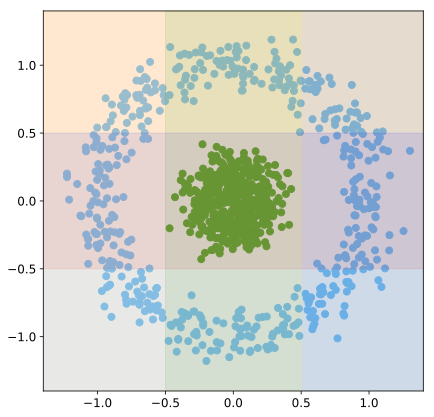

In [55]:
from sklearn.datasets.samples_generator import make_circles

X, y = make_circles(n_samples=1000, noise=0.10, random_state=0, factor=0.2)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap)


plt.axhspan(-0.5, 1.5, color='red', alpha=0.1)
plt.axvspan(-0.5, 1.5, color='green', alpha=0.1)

plt.axhspan(0.5, -1.5, color='blue', alpha=0.1)
plt.axvspan(0.5, -1.5, color='yellow', alpha=0.1)

plt.gca().set_aspect(1)
plt.xlim([-1.4, 1.4])
plt.ylim([-1.4, 1.4])

None

Now we choose the constant $c_m$ to be the average target value in that region. 

$$
c_m  = \frac{1}{N} \sum_{x_i \in R_m} y_i
$$

This works extremly well in the example above. The problem is to find the best splits in the parameter space.
This is an NP-Hard optimization problem, meaning it would generally take too long to solve.

It is possible to employ a greedy strategy to approximate the optimal solution. We constrain the problem of finding 
the 'best' split by only allowing binary decisions. We only allow the subspace to be split into 'left' or 'right'.

We can split the subspace by performing recursive binary splits of the subspace using the split which yields the lowest value for a given loss function.

Algorithms performing these steps are called __Decision Tree__ methods.
One advantage of binary splits is the straightforward intepretation of the results.
Here is a simple way to decide wether you should eat some pizza using a decision tree:

![pizza_tree.png](attachment:pizza_tree.png)

The cells below show how to train and display a decision tree using scikit-learn.

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons

np.random.seed(1234)

X, y = make_moons(n_samples=200, noise=0.10)
clf = DecisionTreeClassifier(max_depth=2, criterion='entropy')
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons

from sklearn import tree
from sklearn.tree import export
from graphviz import Source
from ipywidgets import interact
from IPython.display import display
from IPython.display import SVG
from matplotlib.colors import to_rgb


# set colors to match colorscheme of this notebook
def to_rgb_int(color):
    return [int(255 * c) for c in to_rgb(color)]

def color_brew(n):
    return [to_rgb_int(color) for color in colors]

export._color_brew = color_brew


def plot_tree(crit, depth=1, min_split=0.5, min_leaf=0.2):
    X, y = make_moons(n_samples=200, noise=0.10, random_state=0)
    estimator = DecisionTreeClassifier(
        random_state = 0,
        criterion=crit,
        splitter='best',
        max_depth=depth,
        min_samples_split=min_split,
        min_samples_leaf=min_leaf,
    )
    
    estimator.fit(X, y)

    graph = Source(tree.export_graphviz(
        estimator,
        out_file=None,
        feature_names=['Temperature', 'Precipation'],
        class_names=['0', '1',],
        filled=True,
    ))
    
    display(SVG(graph.pipe(format='svg')))


interact(
    plot_tree,
    crit=["gini", "entropy"],
    depth=(1, 20),
    min_split=(0.1,1),
    min_leaf=(0.1,0.5),
)


interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), IntSlider(value…

<function __main__.plot_tree>

We call this local optimization since we only evaluate the loss function in the subspace of the data defined by the decision tree. It is local to the current node of the decision tree. 

Here is another nice explanation of entropy and information gain, the most popular los functions optimized per subspace. 
https://stackoverflow.com/questions/1859554/what-is-entropy-and-information-gain

Below is an outline (pseudo code) for building a binary decision tree:

```python
def build_tree(space)
    if stopping_criterion_fulfilled():
        return {}

    variable, split_point = find_best_split(space)

    left, right = split_space(space, variable, split_point)

    left_tree = build_tree(left)
    right_tree = build_tree(right)

    return {'node' : (variable, split_point), 'left': left_tree, 'right': right_tree}
```           

In [0]:
def draw_decision_boundaries(clf, ax=None, cmap=cmap, alpha=0.2, **kwargs):
    if not ax:
        ax = plt.gca()

    x_low, x_high = ax.get_xlim()
    y_low, y_high = ax.get_ylim()
    x1 = np.linspace(x_low, x_high, 100)
    x2 = np.linspace(y_low, y_high, 100)

    X1, X2 = np.meshgrid(x1, x2)
    xy = np.column_stack([X1.ravel(), X2.ravel()])
    Z = clf.predict(xy).reshape(X1.shape)

    label = kwargs.pop("label", "Decision Boundary")
    # plot decision boundary and margins
    cs = ax.contourf(X1, X2, Z, **kwargs, cmap=cmap, alpha=alpha, zorder=-1)
    cs.collections[0].set_label(label)
    plt.axis("off")

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
from ipywidgets import interact

X, y = make_moons(n_samples=200, noise=0.10, random_state=0)

def plot_tree(max_depth=1):
    clf = DecisionTreeClassifier(max_depth=max_depth, criterion='entropy')
    clf.fit(X, y)

    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap)
    draw_decision_boundaries(clf)
    
interact(plot_tree, max_depth=(1, 8))

interactive(children=(IntSlider(value=1, description='max_depth', max=8, min=1), Output()), _dom_classes=('wid…

<function __main__.plot_tree>

Below we apply a decision tree to the Titanic dataset while varying some parameters like depth and which loss function to use. The results are plotted into a heatmap.

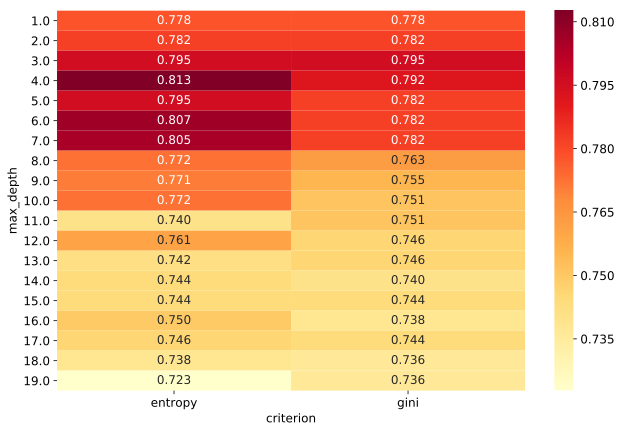

In [60]:
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
np.random.seed(1235)

# load the data
X = df[['sex_code', 'pclass', 'fare', 'age']]
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# loop over every possible combination of parameters 
perf = pd.DataFrame()
ps = ParameterGrid({
    'max_depth': range(1, 20),
    'criterion': ['entropy', 'gini']
})

for d in ps:
    
    clf = DecisionTreeClassifier(max_depth=d['max_depth'], criterion=d['criterion'])
    clf.fit(X_train, y_train)

    acc = accuracy_score(y_test, clf.predict(X_test))
    perf = perf.append({'max_depth': d['max_depth'], 'criterion': d['criterion'], 'accuracy': acc}, ignore_index=True)

# plot a heatmap to see the best paramter combination. 
perf = perf.pivot('max_depth', 'criterion', 'accuracy')
sns.heatmap(perf, cmap='YlOrRd', annot=True, fmt='.3f', label='Accuracy')
None


### k - Nearest Neighbour Methods

The k-NN classifier is ano therlocal optimizer.

Lets assume that the decision function is constant over some local region in the parameter space:

$$
\hat{f}(x_0) = \hat{y} = \frac{1}{k} \sum_{x_i \in N_k(x_o)} y_i
$$

where $x_i \in N_k(x)$ describes the $k$ points in the training data $\mathbf{X}$ that are in the *neighbourhood* of $x_0$.

To put it in words. We assume $x$ will have the same $y$ as other points nearby.

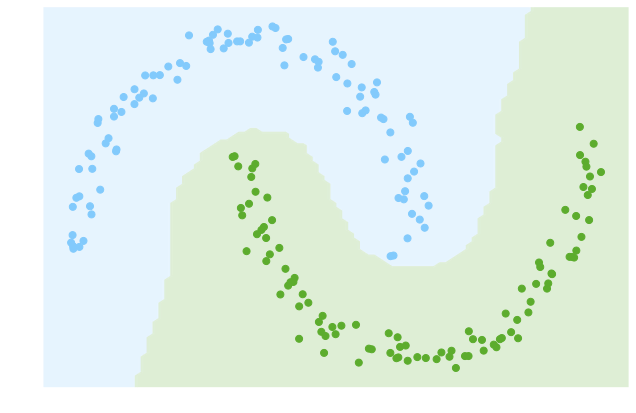

In [61]:
from sklearn.datasets.samples_generator import make_moons
from sklearn.neighbors import KNeighborsClassifier

X, y = make_moons(n_samples=200, noise=0.05)


knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap)
draw_decision_boundaries(knn)

This works pretty well in this artifical, low-noise, example. 

Classification on noisy data will not work as good.

Real world data always has some form of noise.

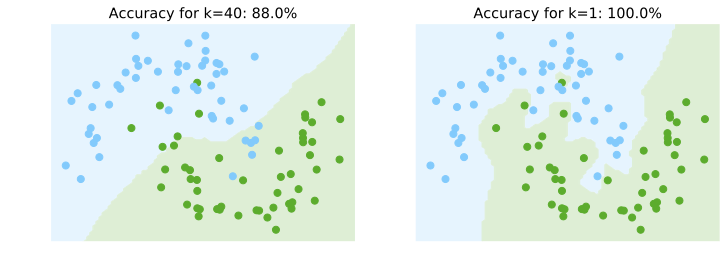

In [62]:
np.random.seed(1234)
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

X, y = make_moons(n_samples=100, noise=0.2)


fig, axs = plt.subplots(1, 2, figsize=(12, 4))

for ax, n_neighbors in zip(axs, (40, 1)):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X, y)

    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap)
    draw_decision_boundaries(knn, ax=ax)
    ax.set_title(f'Accuracy for k={n_neighbors}: {accuracy_score(y, knn.predict(X)):.1%}')
    ax.axis('off')

None

## Classifier Validation 

So far we only looked at the *accuracy* measure of each classifier. We did not however compute any uncertainties on that number. There are ways to compute uncertainties on numbers like accuracy. First we try to motivate why these errors are needed.


### Overfitting (Bias-Variance Tradeoff)

The so called Bias-Variance Dillemma (or Bias-Variance Tradeoff) is a universal problem in supervised machine learning. 

There are two, often conflicting, goals we try to achieve when performing supervised machine learning:
* Optimize some parameters on some training data as much as possible
* Generalize what we learned to new data. 

This introduces two sources of errors 

* High variance of the predictior can make the learned parameters prone to noise in the training data.  
* High bias might decrease overall predictor performance.

If the parameters are tuned to the noise in the training data, or the model is too complex, the model will not generalize to new data but perform vey well on the test data.
This problem is often called __overfitting__

Below we see an example for overfitting using the k-NN classifier. We plot the accuracy of the classifier on the 
training data and the test data versus the model complexity. 

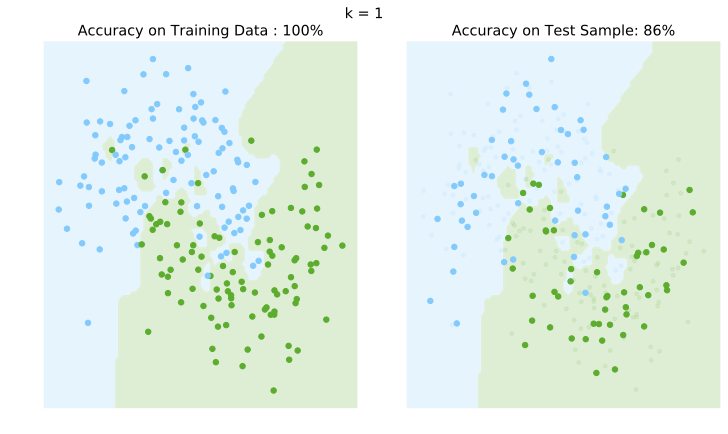

In [63]:
k = 1
noise = 0.3

np.random.seed(0)

X, y = make_moons(n_samples=200, noise=noise)
X_test, y_test = make_moons(n_samples=100, noise=noise)

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6), constrained_layout=True)
fig.suptitle(f'k = {k}')
ax1.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap)
draw_decision_boundaries(knn, ax=ax1)
ax1.set_title('Accuracy on Training Data : {:.0%}'.format(accuracy_score(y, knn.predict(X))))
ax1.axis('off')

ax2.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=30, cmap=cmap)
ax2.scatter(X[:, 0], X[:, 1], c=y, s=15, alpha=0.1,  cmap=cmap)
draw_decision_boundaries(knn, ax=ax2)
ax2.set_title('Accuracy on Test Sample: {:.0%}'.format(accuracy_score(y_test, knn.predict(X_test))))
ax2.axis('off')
None

In [0]:
np.random.seed(1234)

X, y = make_moons(n_samples=400, noise=0.2)
X_test, y_test = make_moons(n_samples=400, noise=0.2)

e_train = []
e_test = []

param_range = np.arange(1, 200)

for p in param_range:
    clf = KNeighborsClassifier(n_neighbors=p)    
    clf.fit(X, y)

    e_train.append(1- accuracy_score(y, clf.predict(X)))
    e_test.append(1 - accuracy_score(y_test, clf.predict(X_test)))
    


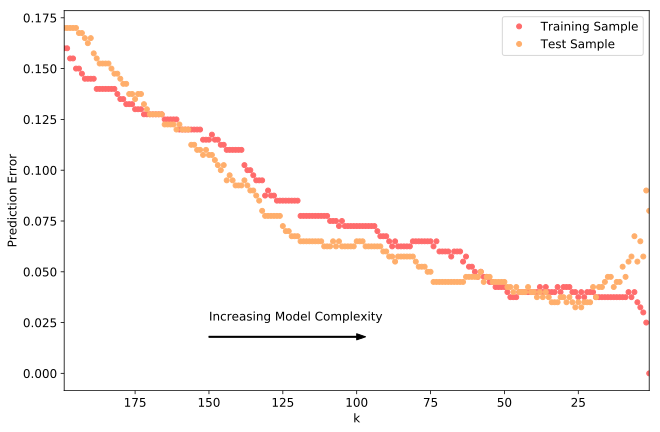

In [65]:
plt.plot(param_range, e_train,'.', color='#FF6B6B', ms=10, label='Training Sample')
plt.plot(param_range, e_test, '.' ,color='#FFAE6B', ms=10, label='Test Sample', )

plt.xlim(param_range[-1], param_range[0])
plt.xlabel('k')
plt.ylabel('Prediction Error')

plt.text(150, 0.026, 'Increasing Model Complexity')
plt.arrow(150, 0.018, -50, 0, width = 0.0005, head_width=0.003, head_length=3, fc='k', ec='k')
plt.legend()

### Validation on independent test sets

Validating the fitted models is essential for avoiding overfitting.

The predictions error has to be assesed on an independent test dataset. 

Models might still be susceptible to noise in the training data.

#### Cross Validation

A $k$-fold cross validation automatically splits the training data into $k$ subsets.

The model is then trained on $k-1$ subsets and evaluated on the remaining set. 

![cv.png](attachment:cv.png)

Below we use sklearn's cross validation method to estimate the accuracy of a Decision Tree  classifier on many independent test sets. 

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate


X = df[['sex_code', 'pclass', 'fare', 'age']]
y = df['survived']

clf = DecisionTreeClassifier(max_depth=5)
r = cross_validate(clf, X=X, y=y, cv=5, scoring=['accuracy'], return_train_score=True)

print('Accuracy on test sets: {:.0%} ± {:.0%}'.format(r['test_accuracy'].mean(), r['test_accuracy'].std() ))
print('Accuracy on training sets: {:.0%} ± {:.0%}'.format(r['train_accuracy'].mean(), r['train_accuracy'].std() ))


Accuracy on test sets: 71% ± 13%
Accuracy on training sets: 84% ± 2%


#### Other Quality Metrics

Accuracy is not always a good measure of model quality.

Imagine a classifier function which simply predicts a fixed outcome.

        def f_fixed(x):
            return 0
            
On an imbalanced dataset this classifier will have an accuracy equal to the ratio of positive examples to the total number of examples.

In [67]:
def f_fixed(x):
    return np.zeros(shape=len(x))


X = df[['sex_code', 'pclass', 'fare', 'age']]
y = df['survived']

print('Accuracy of fixed classifier {:1.6f} \n'.format(accuracy_score(y, f_fixed(X))))

print('Ratio of survived to total passengers: ')
print(df.survived.value_counts(normalize=True))


Accuracy of fixed classifier 0.591388 

Ratio of survived to total passengers: 
False    0.591388
True     0.408612
Name: survived, dtype: float64


Another view at the confusion matrix. It generalizes to more than two classes as seen in the picture below.

![confusion_matrix.png](attachment:confusion_matrix.png)

The numbers in the confusion matrix can be used to calculate a whole range of quality criteria.

Lets build a classifier which randomly chooses an outcome and look at the different criteria.

```
def f_random(passenger):
    return np.random.choice(['yes', 'no')
```


<a href="https://stackoverflow.com/questions/31324218/scikit-learn-how-to-obtain-true-positive-true-negative-false-positive-and-fal" style="color:#BBBBBB;">The nice Stack Overflow post where I stole the picture from.</a>



In [68]:
def f_random(x):
    return np.random.randint(2, size=len(x))

prediction = f_random(X)

cm = confusion_matrix(y, prediction)

FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

perf = {}
# Sensitivity, hit rate, recall, or true positive rate
perf['TPR'] = TP/(TP+FN)
# Specificity or true negative rate
perf['TNR'] = TN/(TN+FP) 
# Precision or positive predictive value or purity
perf['PPV'] = TP/(TP+FP)
# Negative predictive value
perf['NPV'] = TN/(TN+FN)
# Fall out or false positive rate
perf['FPR'] = FP/(FP+TN)
# False negative rate
perf['FNR'] = FN/(TP+FN)
# False discovery rate
perf['FDR'] = FP/(TP+FP)

# Overall accuracy
perf['ACC'] = (TP+TN)/(TP+FP+FN+TN)

for k, v in perf.items():
    print(k, np.round(v, 2))

TPR [0.5  0.47]
TNR [0.47 0.5 ]
PPV [0.58 0.39]
NPV [0.39 0.58]
FPR [0.53 0.5 ]
FNR [0.5  0.53]
FDR [0.42 0.61]
ACC [0.49 0.49]


In [69]:
from sklearn.metrics import recall_score, precision_score
print(recall_score(y, prediction))
print(precision_score(y, prediction))

0.47306791569086654
0.39453125


Precision and recall can be understood in an intuitive way

* __Recall__ How many of the wanted examples are found.
* __Precision__ The percentage of the found examples that are actually relevant.

So what should you optimize for? Maximumg accuracy or precision or recall?

There is no clear answer.  
It depends on your use-case.  
Can you tolerate false positives?   
Can you tolerate losing some true positives?  

We will always have to make the trade-off between recall and precission. 
There are several metrics which try to combine both into one.

The $f_{\beta}$ score is one example.

$$
f_{\beta } = (1+\beta ^{2})\cdot {\frac {\mathrm {precision} \cdot \mathrm {recall} }{(\beta ^{2}\cdot \mathrm {precision} )+\mathrm {recall} }} =
\frac {(1 + \beta^2) \cdot TP }{(1 + \beta^2) \cdot TP + \beta^2 \cdot FN + FP}.
$$

But in the end there is no absolute truth to what's best.


Imagine you devise a new, cheap and easy cancer test.   
What should you optimize your decision threshold for?
Precision or recall?

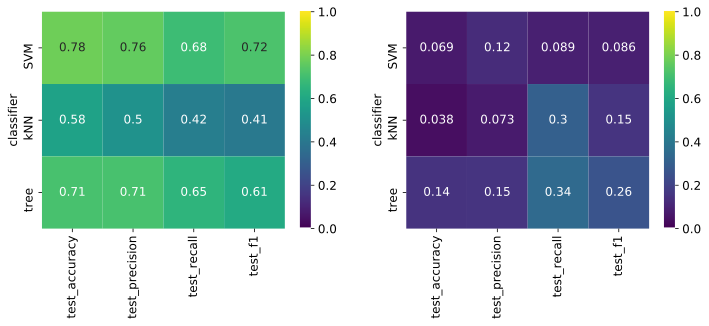

In [70]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

np.random.seed(1234)

X = df[['sex_code', 'pclass', 'fare', 'age']]
y = df['survived']

svc = SVC(kernel='linear')
knn = KNeighborsClassifier(n_neighbors=5)
tree = DecisionTreeClassifier(max_depth=5)

results = []
for clf, name in zip([svc, knn, tree], ['SVM', 'kNN', 'tree']):
    r = cross_validate(
        clf, X=X, y=y, cv=5,
        scoring=['accuracy', 'precision', 'recall', 'f1'],
        return_train_score=False,
    )
    perf = pd.DataFrame.from_dict(r)
    perf['classifier'] = name
    results.append(perf)

perf = pd.concat(results).drop(['fit_time', 'score_time'], axis='columns')

means = perf.groupby('classifier').mean()
deviations = perf.groupby('classifier').std()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.heatmap(means, cmap='viridis', annot=True, ax=ax1, vmin=0, vmax=1)
sns.heatmap(deviations, cmap='viridis', annot=True, ax=ax2, vmin=0, vmax=1)


## Decision Thresholds and Classifier Validation

Classifier objects usually provide all of the following methods

* `classifier.fit(X)` takes training data and finds some parameters based on that data.
* `classifier.predict(X_new)` takes new data (one row or many) and predicts the target label for each row.
* `classifier.predict_proba(X_new)` takes new data (one row or many) and predicts 'some notion of confidence'.

In the case of binary classification (i.e. two classes) the `classifier.predict_proba` usually returns a number where higher numbers indicate some measure of 'confidence'.

The `classifier.predict(X_new)` is basically a wrapper around the `predict_proba` function which simply applies a decision threshold at some value (usually 0.5).
This is exactly what we did in the case of linear least squares regression.


$$
\hat{Y} = \begin{cases}
\text{Yes}, & \text{if $ f(X) \gt 0.5$} \\
\text{No}, & \text{if $ f(X) \le 0.5$}
\end{cases}
$$

In this case the decision threshold corresponds to the distance of a point to the seperating hyperplane.

Below we see two overlapping blobs of points. A seperating line is drawn in between the two populations. 
Intuitively we can associate a higher degree of 'certainty' regarding class membership to points farther away from the line.

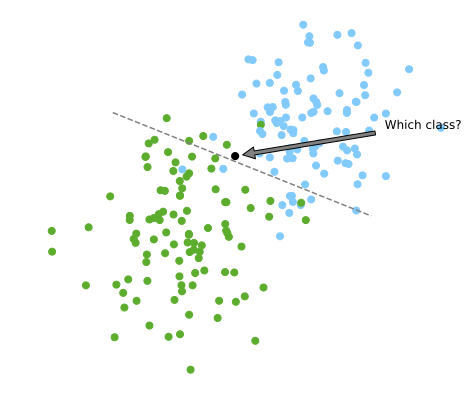

In [71]:
X, y = make_blobs(n_samples=200, centers=2, random_state=3, cluster_std=1.70)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap)

xs = np.linspace(-6.5, 3, 2)
plt.plot(xs, -0.4 * xs + 2, color='gray', linestyle='--')
circle = plt.Circle((-2, 3), 0.15, fc='black')
plt.gca().add_patch(circle)
plt.gca().set_aspect('equal')
plt.gca().annotate('Which class?', xy=(-2, 3), xytext=(3.5, 4), arrowprops=dict(facecolor='gray', shrink=0.05),)

plt.axis('off')
None

#### Varying the Threshold

Varying the decision threshold is extremely useful for modifying your classifier output to create more/less 
'conservative' predictions.


In essence this is a new classifier/predictor with a free parameter. The old $\hat{y} = \hat{f}(x)$ now becomes

$$
\hat{y} = \hat{f}(x, \alpha)
$$

where $\alpha$ is a parameter which can be chosen freely (or optimized according to some criterion which has 
nothing to do with the underlying loss function of the predictor.)

The example below shows how the number of true positives can be influenced by varying the threshold $\alpha$

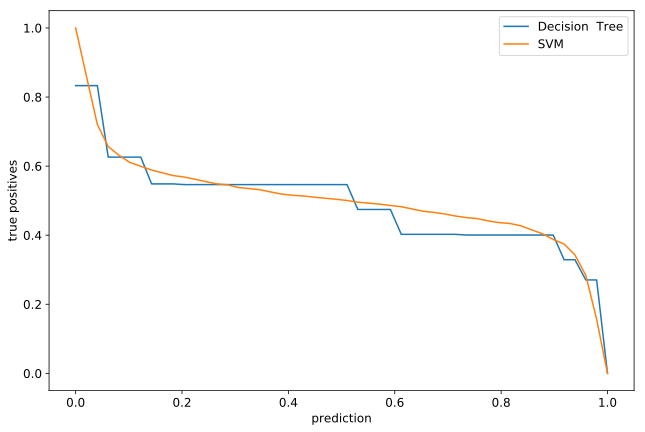

In [72]:
N = 2000
X, y = datasets.make_moons(n_samples=N, noise=0.3)
X_test, y_test = datasets.make_moons(n_samples=N, noise=0.3)


clf = DecisionTreeClassifier(max_depth=5, criterion='entropy')
clf.fit(X, y)
y_predicted = clf.predict_proba(X_test)[:, 1]

thresholds = np.linspace(0, 1, 50)

tp = [(y_predicted > t).sum()/N for t in thresholds]
plt.plot(thresholds, tp, label='Decision  Tree')


clf = SVC(probability=True, gamma='scale')
clf.fit(X, y)
y_predicted = clf.predict_proba(X_test)[:, 1]

tp = [(y_predicted > t).sum()/N for t in thresholds]
plt.plot(thresholds, tp, label='SVM')

plt.legend()
plt.xlabel('prediction')
plt.ylabel('true positives')
None

#### Receiver Operating Characteristic 

The decision threshold is incredibly helpful in validating classifier performance.

The plot of false positive rate vs. true positive rate while varying the decision threshold is called the Receiver Operating Characteristic curve (ROC curve).

It is a very popular tool for classifier performance evaluation.

Wikipedia Quote:

> Following the attack on Pearl Harbor in 1941, the United States army began new research to increase the prediction of correctly detected Japanese aircraft from their radar signals. For this purposes they measured the ability of radar receiver operators to make these important distinctions, which was called the Receiver Operating Characteristics.


A classifier which assigns random labels to the data will have a ROC curve which lies on the diagonal. With an area under curve (AUC) of 0.5.


__Problems__

There are circumstance in which the ROC is not a good measure of quality. 

See https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve for a discussion.

Also in the case of imbalanced classes (eg. imagine you had 10000 surviors but 10 deceased passengers) the ROC curve itself won't change. The intepretation of the ROC curve however changes drastically.

In that case its better to plot the precission vs recall curve and the corresponding area under curve.

See https://classeval.wordpress.com for some very good discussions on classifier evaluation.

0.9954545454545455


Text(0, 0.5, 'True Positive Rate')

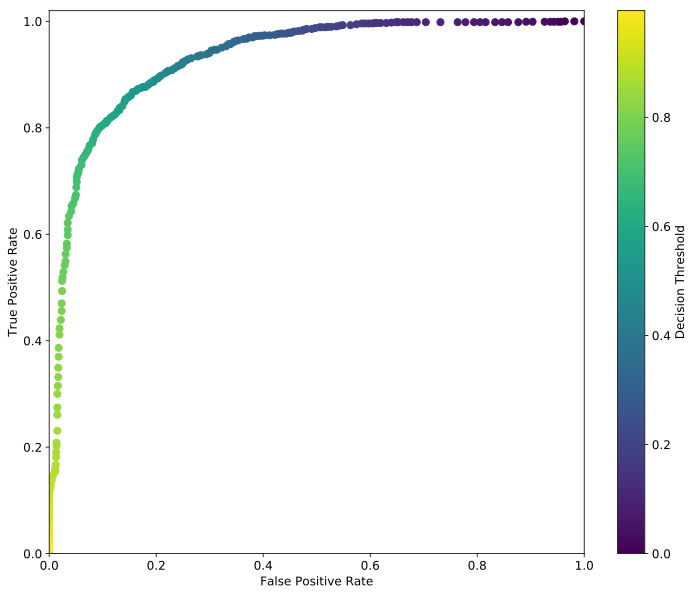

In [73]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve

X, y = make_classification(n_samples=10000, n_features=10, n_informative=2, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y)

prediction = KNeighborsClassifier(n_neighbors=220).fit(X_train, y_train).predict_proba(X_test)[:, 1]

fpr, tpr, t = roc_curve(y_test, prediction)
t[0] = 0 # do this for nicer plotting. it is set to 2 otherwise ruiing the colormap
print(t.max())
plt.figure(figsize=(12, 10))
plt.scatter(fpr, tpr, c=t, cmap='viridis', s=50)
plt.colorbar(label='Decision Threshold')
plt.xlim([0, 1])
plt.ylim([0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

## Ensemble Methods

We have used a decision tree to classifiy artificial data as well as the Titanic data. 

Theoretically a decision tree is not limited in its depth. 

This quickly leads to overfitted tree models.


### Bagging

A popular way to build ensembles is called *bagging*.

Split the training data into $B$ subsets using sampling with replacement (Bootstrapping). For each subset $b$ we train a classifier $\hat{f}_b$. Bagging then combines the overall prediction by taking the average.  

$$
\hat{y} = \hat{f}_{\text{bag}}(x) = \frac{1}{B} \sum_{b=1}^B \hat{f}_b (x) 
$$

### Random Forests

Random Forests are a modification to bagging in which a number of *randomized decision trees* are trained. These randomized decision trees use a random subset of variables to find the best split in each node.


Random Forests are a very popular choice for classification tasks since their parameters can be easily tuned and they often outperform other methods.

In [74]:
np.random.seed(2)
from sklearn.metrics import roc_curve, roc_auc_score, make_scorer
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



X = df[['sex_code', 'pclass', 'fare', 'age']]
y = df['survived']

tree = DecisionTreeClassifier(min_samples_leaf=5)

rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=5)

np.random.seed(0)
score = cross_validate(tree, X, y, scoring=make_scorer(roc_auc_score), cv=5)
print('ROC AUC Decision Tree {:0.3f} +/- {:0.3f}'.format(score['test_score'].mean(), score['test_score'].std()))
np.random.seed(0)
score = cross_validate(tree, X, y, scoring=make_scorer(accuracy_score), cv=5)
print('Accuracy {:0.3f} +/- {:0.3f}'.format(score['test_score'].mean(), score['test_score'].std()))

np.random.seed(0)
score = cross_validate(rf, X, y, scoring=make_scorer(roc_auc_score), cv=5)
print('ROC AUC Random Forest {:0.3f} +/- {:0.3f}'.format(score['test_score'].mean(), score['test_score'].std()))
np.random.seed(0)
score = cross_validate(rf, X, y, scoring=make_scorer(accuracy_score), cv=5)
print('Accuracy {:0.3f} +/- {:0.3f}'.format(score['test_score'].mean(), score['test_score'].std()))

ROC AUC Decision Tree 0.672 +/- 0.085
Accuracy 0.673 +/- 0.097
ROC AUC Random Forest 0.679 +/- 0.120
Accuracy 0.689 +/- 0.128


## Regression

Regression and classification are very similar in nature. The biggest difference being that the target variable $y$ is continous and has a natural ordering associated with it. 

The same basic rules for classification apply for regression as well. 

* Models need to be verified on independent test data
* There is a tradeoff between bias and variance. Overfitting can occur.
* There are many quality measures to pick from. 

The loss functions we are minimizing need to be adapted. 
For classification the loss function for the decision tree was based on entropy. The one for the Naive Bayes 
classifier was the 0-1 loss. Both are designed to improve classification. 

To make a regressor out of a decision tree we can change the loss function to minimize the variance of the 
target variable in the node. 

To find the best split, we minimize the variance of the target , $\mathit{Var(y)}$,  over all features  $X \in 
\mathbf{X}$ and splits $s$

The algorithm stays the same we simply changed the way to select the features in each step according to 

$$
  \min_{(X, s) \in \, \mathbf{X} \times {S}}Var(Y_S)
$$

where $Y_S$ are the values of the target variable in the subspace created by splitting the data on the feature $X$ at a value $s$ 



Our regression task is to predict the price of a house from the 13 given variables. From a plot of some of the variables we can see some weak correlations in some variables.

None of these variables alone would suffice to build a good predictor. Hence we try to use multivariate regression methods.

In [0]:
from sklearn.datasets import load_boston

houses = load_boston()
names = list(houses.feature_names) +  ['price']
data = pd.DataFrame(data=np.column_stack([houses['data'], houses['target']]), columns=names)

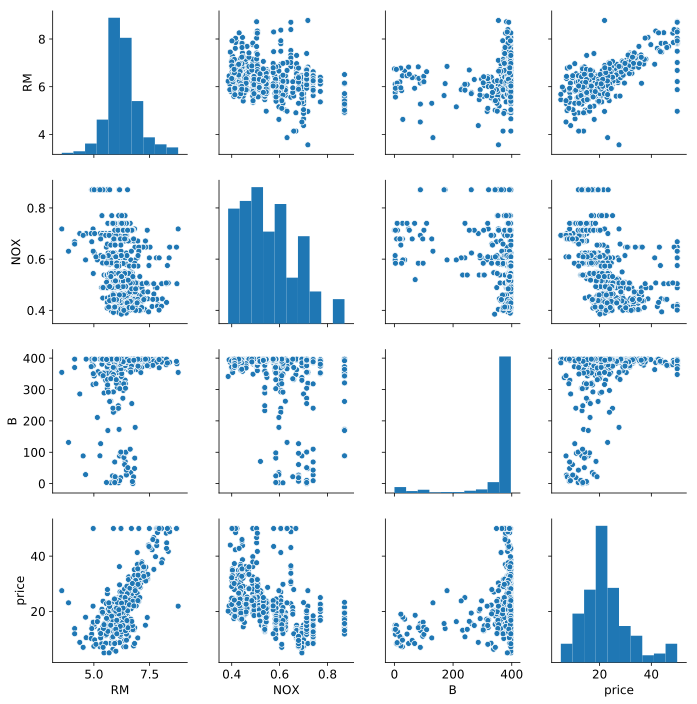

In [76]:
sns.pairplot(data[['RM', 'NOX', 'B', 'price']])

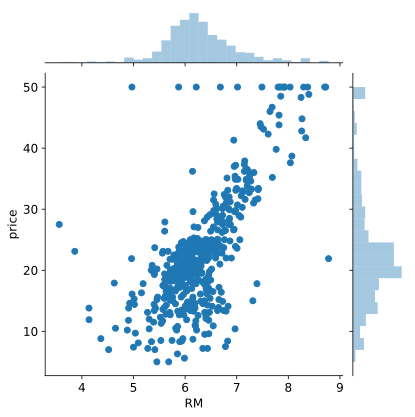

In [77]:
sns.jointplot(data.RM, data.price, kind='scatter')

The question this data set can help us answer is:

> What is the price of a house based on geographical criteria?

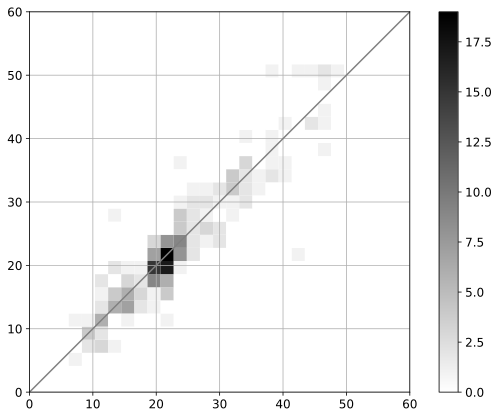

In [78]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(n_estimators=100)

X_train, X_test, y_train, y_test = train_test_split(houses.data, houses.target, test_size=0.5)
reg.fit(X_train, y_train)
prediction = reg.predict(X_test)

bin_edges = np.linspace(0, 60, 30)
plt.hist2d(prediction, y_test, bins=bin_edges, cmap='gray_r',)
plt.colorbar()
plt.grid()
plt.plot([0, 60], [0, 60], color='gray')
plt.gca().set_aspect(1)
None

### Regression is not Curve Fitting

The output of the predictor shows stronger correlation than any of the other variables. It is still noisy and shows some smearing and outliers. The output of a regressor should never be understood as 'true' but rather as a new correlated variable which can show noise and bias. 


There is a fundamental difference between *curve fitting* and regression.

* __Curve Fitting__ All data is available. Some known (or presumed) analytical function is fit to the data to estimate free parameters of that function.


* __Regression__ Training data is available. A model is fitted on training data to predict the dependent variable on some new, unknown, data.

There is a lot more to learn about linar models and regression. Check sklearn's user guide on linear models for more information 
http://scikit-learn.org/stable/modules/linear_model.html

A very popular regression metric is the $R^2$ score. Read about it here

https://en.wikipedia.org/wiki/Coefficient_of_determination

and here

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html .

# Application to FACT Data

![APP](images/app_overview.png)

The big picture, we want to measure gamma-rays from astrophysical sources, e.g. Ultramassive black-holes 
at the centers of galaxies (Active Galactic Nuclei) or Supernova-Remnants.

Unfortunately, we also have protons reaching Earth and in far higher numbers.

At energies below 50 GeV, sattelites are best suited for gamma-ray observations, above,
events rates got too low to provide reasonable statistics.

Here we use ground-based Imaging Air Cherenkov Telescopes
![iacts.jpg](attachment:iacts.jpg)

![fact.jpg](attachment:fact.jpg)

* FACT is a small Imaging Air Cherenkov Telescope
* Location: La Palma, Spain
* Energy range: ≈500 Gev to 50 GeV


### Data

* 1440 SiPM pixels
* Each event 300 value per pixel at 2 GSample/s

#### Tasks

For each event, reconstruct:

* Particle type (Classification)
* Energy (Regression)
* Direction (2d Regression)

#### Analysis Steps

* Calibrate pixel timeseries
* For each pixel, reduce to number of photons and their mean arrival time
* Calculate image features from #photons and mean arrival time
* Use machine learning methods to solve the tasks above

⇒ Train machine learning models on simulated events where truths are known  
and apply to observed data to do physics. 

#### Image Parameters

<img width="50%" alt="" src="images/hillas.png" />

These are the most important ones, but we calculate many more.

### Particle Classification

In [79]:
fact = pd.read_hdf('fact_simulations.hdf5', key='events')

fact['label'] = (fact['corsika_run_header_particle_id'] == 1).astype(int)
fact['particle'] = np.where(fact['label'], 'gamma', 'proton')

fact.describe()

,size,cog_x,cog_y,delta,length,width,kurtosis_long,kurtosis_trans,skewness_long,skewness_trans,...,source_position_az,source_position_zd,pointing_position_az,pointing_position_zd,corsika_event_header_total_energy,corsika_event_header_num_reuse,corsika_event_header_event_number,corsika_run_header_run_number,corsika_run_header_particle_id,label
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000
mean,213.755478,1.803053,-8.693332,0.075002,16.436661,7.230460,1.916972,2.133895,0.000602,0.000120,...,263.003815,14.265347,261.632874,14.316373,3623.974121,5.75819,1169.256255,42644.060035,7.500000,0.500000
std,949.841736,86.738808,88.095261,0.893300,10.513175,4.215881,0.636325,0.675290,0.370723,0.331042,...,152.721741,8.595661,151.862930,8.600089,10121.978516,6.26690,816.232224,34894.794495,6.500016,0.500001
min,17.047625,-180.783554,-179.226120,-1.570787,5.703759,0.012539,0.785779,0.746084,-4.536128,-3.814438,...,-6.999854,0.015081,-6.999997,0.000000,100.015465,1.00000,1.000000,10910.000000,1.000000,0.000000
25%,41.808624,-67.147039,-80.792892,-0.687825,9.440227,5.203832,1.564480,1.774488,-0.200390,-0.188822,...,184.796436,6.762028,101.520061,7.000000,540.910034,1.00000,503.000000,13892.000000,1.000000,0.000000
50%,73.909443,1.977239,-12.144912,0.137064,13.306550,6.475314,1.823479,2.111772,0.001790,-0.001434,...,353.000000,13.837936,352.999985,14.000000,1126.852173,1.00000,1043.000000,27841.000000,7.500000,0.500000
75%,159.963505,71.278582,61.006674,0.847829,19.673778,8.202693,2.121336,2.439792,0.202304,0.187330,...,353.000000,21.591839,353.000000,21.844213,2854.908875,11.00000,1699.000000,68918.000000,14.000000,1.000000
max,140237.015625,182.026413,178.830505,1.570779,176.761597,94.568802,22.106855,27.650311,3.838194,3.817266,...,353.000000,30.599998,353.000000,32.633961,234645.687500,20.00000,3000.000000,108764.000000,14.000000,1.000000


In [80]:
fact.columns

Index(['size', 'cog_x', 'cog_y', 'delta', 'length', 'width', 'kurtosis_long',
       'kurtosis_trans', 'skewness_long', 'skewness_trans',
       'concentration_cog', 'concentration_core', 'concentration_one_pixel',
       'concentration_two_pixel', 'leakage1', 'leakage2', 'num_islands',
       'num_pixel_in_shower', 'photoncharge_shower_max',
       'photoncharge_shower_mean', 'photoncharge_shower_variance',
       'slope_long', 'time_gradient_slope_long', 'source_position_az',
       'source_position_zd', 'pointing_position_az', 'pointing_position_zd',
       'corsika_event_header_total_energy', 'corsika_event_header_num_reuse',
       'corsika_event_header_event_number', 'corsika_run_header_run_number',
       'corsika_run_header_particle_id', 'label', 'particle'],
      dtype='object')

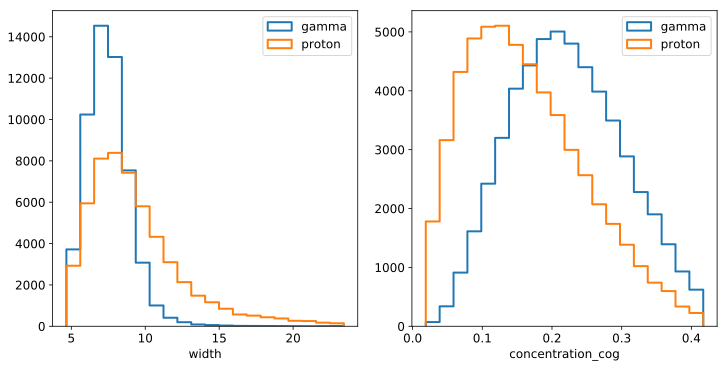

In [81]:
# remove some bad reconstructable events
fact = fact.query('leakage2 < 0.8 and leakage1 < 0.3 and num_pixel_in_shower > 10')


columns = ['width', 'concentration_cog']
fig, axs = plt.subplots(1, len(columns), constrained_layout=True, figsize=(10, 5))

for ax, col in zip(axs, columns):
    for name, group in fact.groupby('particle'):
    
        ax.hist(
            group[col],
            bins=20,
            range=fact[col].quantile([0.01, 0.99]),
            label=name,
            histtype='step',
            lw=2,
        )
    ax.set_xlabel(col)
    ax.legend()

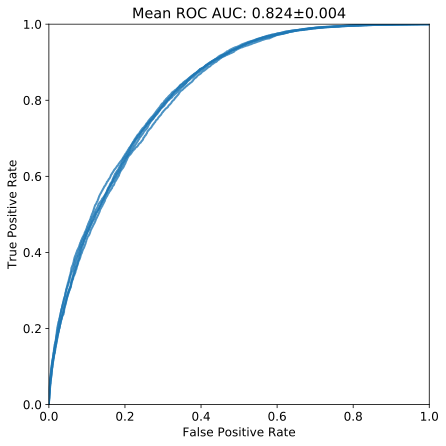

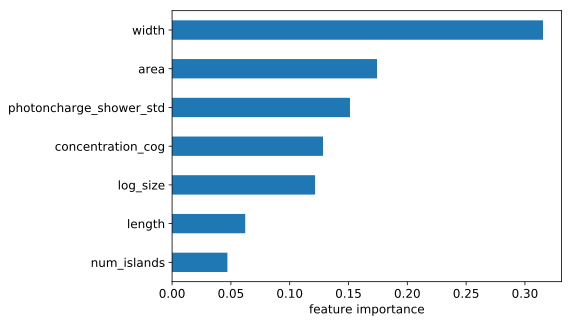

In [82]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score

clf = RandomForestClassifier(n_estimators=25, max_depth=10, n_jobs=-1)

X = fact[['width', 'length', 'concentration_cog', 'num_islands']].copy()
X['log_size'] = np.log10(fact['size'])
X['photoncharge_shower_std'] = np.sqrt(fact['photoncharge_shower_variance'])
X['area'] = X['width'] * X['length']

columns = X.columns

# convert to a plain numpy array
X = X.to_numpy()
y = fact['label'].to_numpy()



cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

aucs = []
for train, test in cv.split(X, y):
    
    clf.fit(X[train], y[train])
    
    # predict proba gives us a probability for each class
    # for only two classes, one is sufficent.
    prediction = clf.predict_proba(X[test])[:, 1]
    
    aucs.append(roc_auc_score(y[test], prediction))
    fpr, tpr, thresholds = roc_curve(y[test], prediction)
        
    plt.plot(fpr, tpr, color='C0', lw=2, alpha=0.8)
    
plt.margins(0)
plt.gca().set_aspect(1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Mean ROC AUC: {np.mean(aucs):.3f}±{np.std(aucs):.3f}')




feature_importances = pd.Series(clf.feature_importances_, index=columns)

plt.figure(figsize=(7, 5))
plt.xlabel('feature importance')
feature_importances.sort_values().plot.barh()

### Energy Regression

Here, we are only interested in the gamma rays

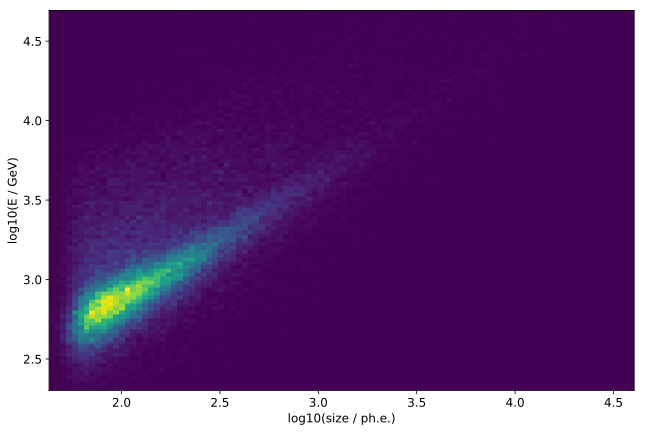

In [83]:
gammas = fact.query('label == 1')

*_, img = plt.hist2d(
    np.log10(gammas['size']),
    np.log10(gammas['corsika_event_header_total_energy']),
    bins=100
)
img.set_rasterized(True)
plt.xlabel('log10(size / ph.e.)')
plt.ylabel('log10(E / GeV)')
None

In [0]:
gammas = gammas.query('num_pixel_in_shower > 10 and num_islands < 8 and length < 70 and width < 35')

In [85]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score


reg = RandomForestRegressor(n_estimators=100, max_depth=20, n_jobs=-1)

X = gammas[[
    'concentration_cog', 'concentration_core', 'concentration_one_pixel',
    'width', 'length', 'num_pixel_in_shower',
    'leakage1', 'leakage2', 
]].copy()
X['log_size'] = np.log10(gammas['size'])
X = X.to_numpy()

y = np.log10(gammas['corsika_event_header_total_energy'].to_numpy())


cv = KFold(n_splits=5)

predictions = []
scores = []
for train, test in cv.split(X, y):
    
    reg.fit(X[train], y[train])
    prediction = reg.predict(X[test])
    
    predictions.append(prediction)
    scores.append(r2_score(y[test], prediction))

predictions = np.concatenate(predictions)

print(f'Mean r2 score: {np.mean(scores):.3f}± {np.std(scores):.3f}')

Mean r2 score: 0.640± 0.007


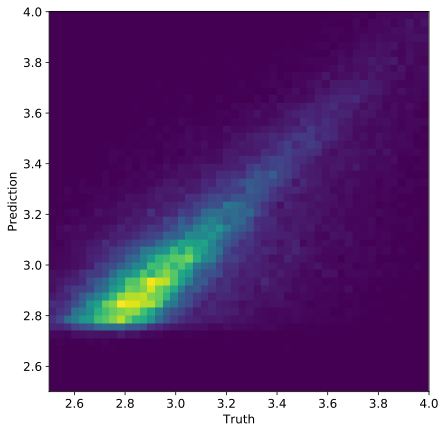

In [86]:
*_, img = plt.hist2d(
    y,
    predictions,
    bins=50,
    range=[[2.5, 4], [2.5, 4]],
)
img.set_rasterized(True)
plt.xlabel('Truth')
plt.ylabel('Prediction')
plt.gca().set_aspect(1)

# More Material

Statistical Methods Lecture at TU Dortmund (the basis for this notebook with more math): 
https://github.com/mackaiver/machine-learning-lecture 


Read scikit-learns's user guide. It's detailed and describes pros and cons of many alogirthms and evaluation criteria. Its also full of code examples.

http://scikit-learn.org/stable/user_guide.html

Read the book by Hastie (if you're a crazy maths person)

http://web.stanford.edu/~hastie/ElemStatLearn/

Read this book by James and Hastie (if you're a normal person)

http://www-bcf.usc.edu/~gareth/ISL/